In [1]:
import pandas as pd # read data from a CSV
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
import math
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance # shuffling_idx  X_permuted

import dataretrieval.nwis as nwis

#import os.path

13092747 (2013-2023) Non-ref

" " 

12413370 (2010-2021) ref, 2490, 28.2

" "

13266000 ref (2017-2018)

" "

 13311000 (2012-2023) Usgs:  646619.3

" "

12305000 (2012-2023)

" "

13340600


In [2]:
site  = "13296000"
# get basic info about the site
df3 = nwis.get_record(sites=site, service='site')

print(df3)
dec_lat_va=df3['dec_lat_va'][0]
dec_long_va=df3['dec_long_va'][0]
station_nm=df3['station_nm'][0]
print(station_nm)

  agency_cd   site_no                              station_nm site_tp_cd  \
0      USGS  13296000  YANKEE FORK SALMON RIVER NR CLAYTON ID         ST   

   lat_va  long_va  dec_lat_va  dec_long_va coord_meth_cd  coord_acy_cd  ...  \
0  441632  1144404   44.278889  -114.733889             N             1  ...   

  local_time_fg reliability_cd  gw_file_cd  nat_aqfr_cd  aqfr_cd aqfr_type_cd  \
0             Y            NaN    NNNNNNNN          NaN      NaN          NaN   

  well_depth_va hole_depth_va  depth_src_cd  project_no  
0           NaN           NaN           NaN         NaN  

[1 rows x 42 columns]
YANKEE FORK SALMON RIVER NR CLAYTON ID


In [3]:
path=  r"../data_prep/prism_df_summer_" +site +".csv"  # os.path.join( r"../data_prep/prism_df_summer_",  site ,".csv" )

data=pd.read_csv( path )  

#12413370,
#13266000,
#13296000 (Yankee Fork Salmon River NR Clayton ID),
#13311000, 13340600, 13092747, 12305000, 13342500, 13150430, 13016450, 13176400

print(data)
print(data.columns)

     Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0           153  2012-06-01      0.00               1.0                9.8   
1           154  2012-06-02      1.73               2.4               12.3   
2           155  2012-06-03      0.96               4.8               11.7   
3           156  2012-06-04      0.01               5.4               12.8   
4           157  2012-06-05      0.00               3.5               13.8   
..          ...         ...       ...               ...                ...   
898        3775  2022-08-27      0.00               8.1               16.4   
899        3776  2022-08-28      0.00               5.3               13.0   
900        3777  2022-08-29      0.00               3.2               13.1   
901        3778  2022-08-30      0.00               4.4               15.6   
902        3779  2022-08-31      0.00               7.1               17.9   

     tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  vpdmax

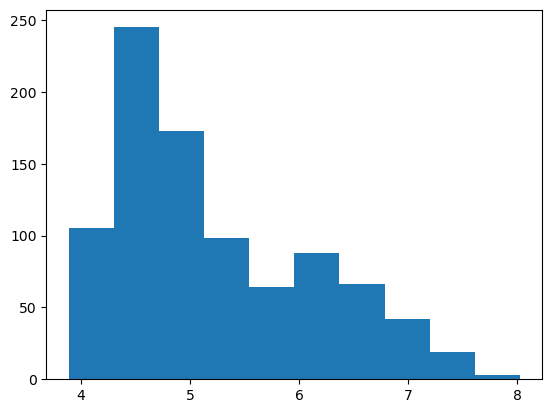

(array([671., 123.,  55.,  26.,  19.,   4.,   2.,   0.,   1.,   2.]),
 array([  48.8 ,  348.92,  649.04,  949.16, 1249.28, 1549.4 , 1849.52,
        2149.64, 2449.76, 2749.88, 3050.  ]),
 <BarContainer object of 10 artists>)

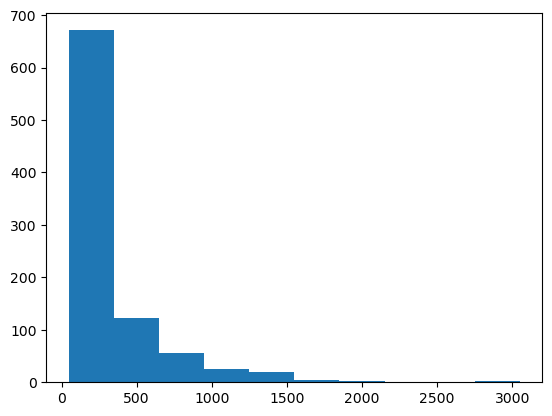

In [4]:
data['log_Q']=np.log(data['X_00060_00003'])
data
plt.hist(data['log_Q'])
plt.show()
plt.hist(data['X_00060_00003'])

Text(0, 0.5, 'Streamflow (cfs)')

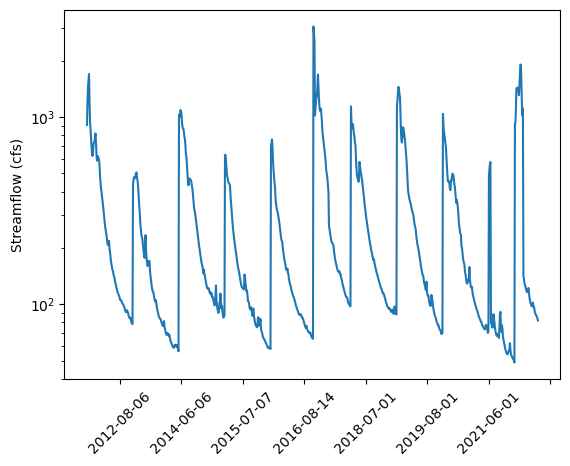

In [5]:
plt.plot(data['Date'] , data['X_00060_00003'] )
plt.yscale('log')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Streamflow (cfs)")

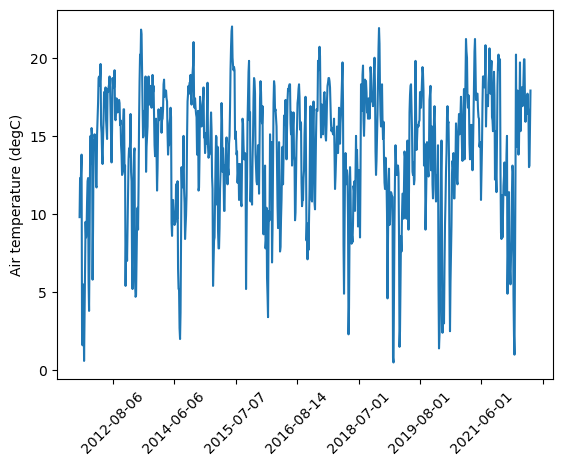

In [6]:
plt.plot(data['Date'] , data['tmean..degrees.C.'] )


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

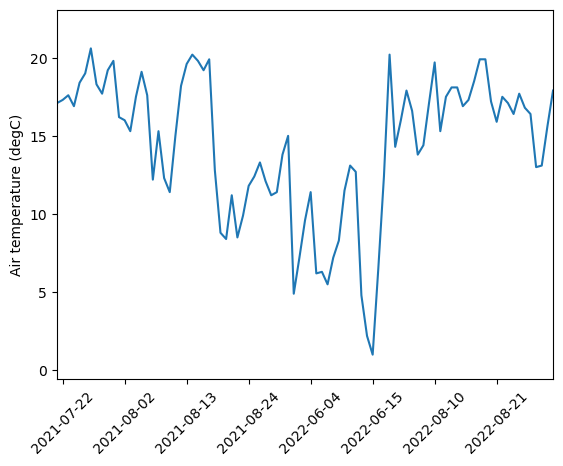

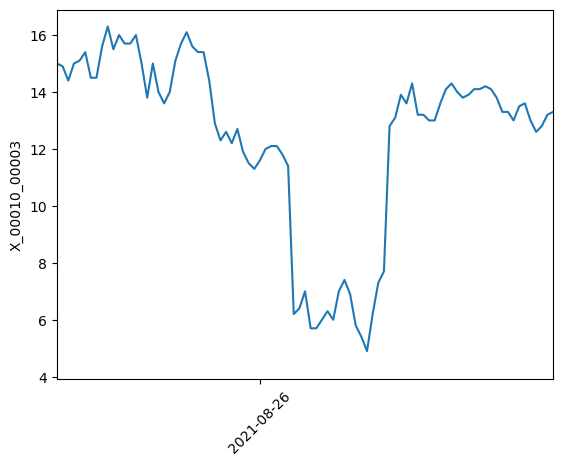

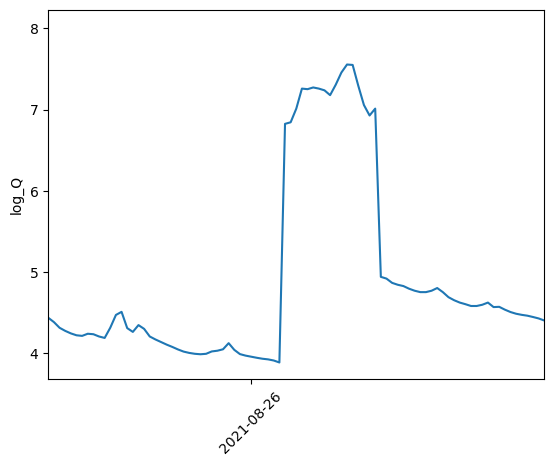

In [7]:
start=len(data)-89
end=len(data)-1

plt.plot(data['Date'] , data['tmean..degrees.C.'] )
plt.xlim(  data['Date'][start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=11))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

plt.plot(data['Date'] , data['X_00010_00003'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('X_00010_00003')
plt.show()

plt.plot(data['Date'] , data['log_Q'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('log_Q')
plt.show()

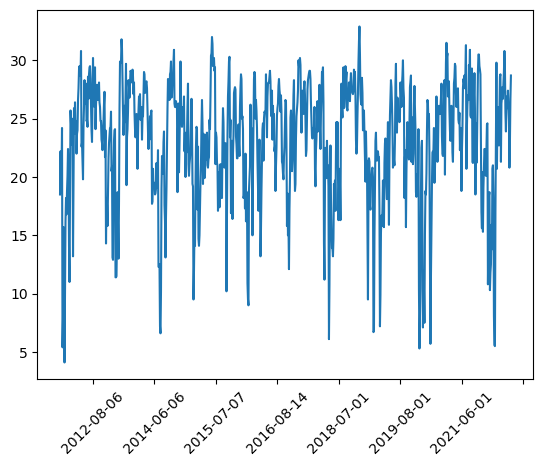

In [8]:
plt.plot(data['Date'] , data[ 'tmax..degrees.C.'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)

Text(0, 0.5, 'Water temperature (degC)')

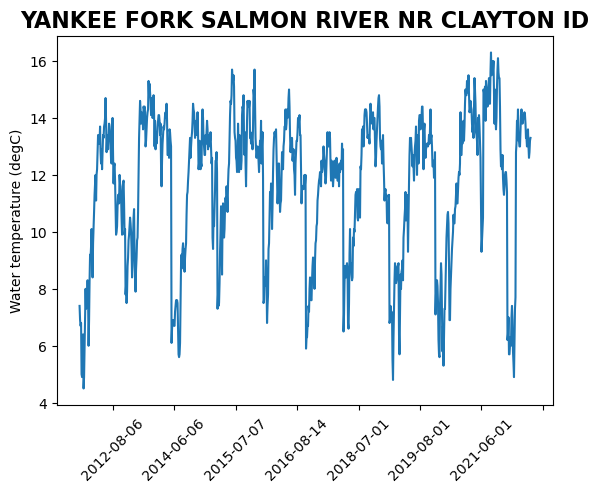

In [9]:
plt.plot(data['Date'] , data[ 'X_00010_00003'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.ylabel("Water temperature (degC)")

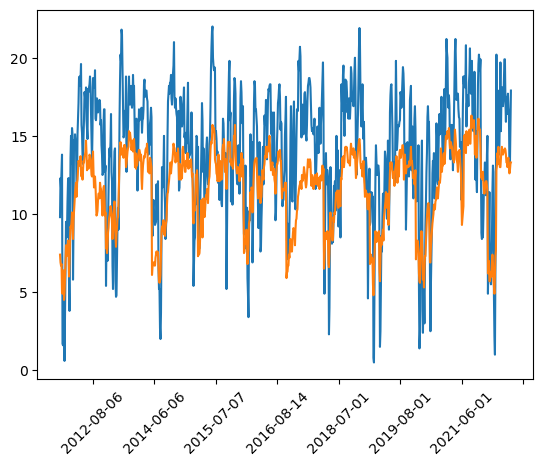

In [10]:
plt.plot(data['Date'] , data[ 'tmean..degrees.C.'] )
plt.plot(data['Date'] , data[ 'X_00010_00003'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)

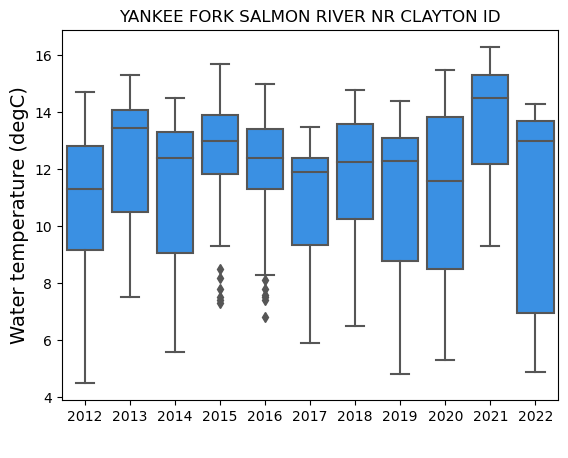

In [11]:
#data.boxplot(column=['X_00010_00003'], by='yr', title=station_nm)

#plt.ylabel("Water temperature (degC)")


import seaborn as sns



ax=sns.boxplot(x="yr", y="X_00010_00003", data=data , color="dodgerblue")
ax.set_ylabel( "Water temperature (degC)" , fontsize=14 #, color="red"
             )
ax.set_xlabel( " " , fontsize=14 #, color="red"
             )
ax.set_title( station_nm)
plt.show()

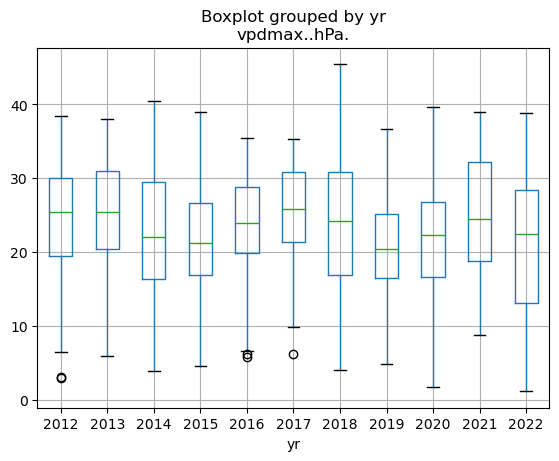

In [12]:
# 'vpdmax..hPa.'
data.boxplot(column=['vpdmax..hPa.'], by='yr')
plt.show()

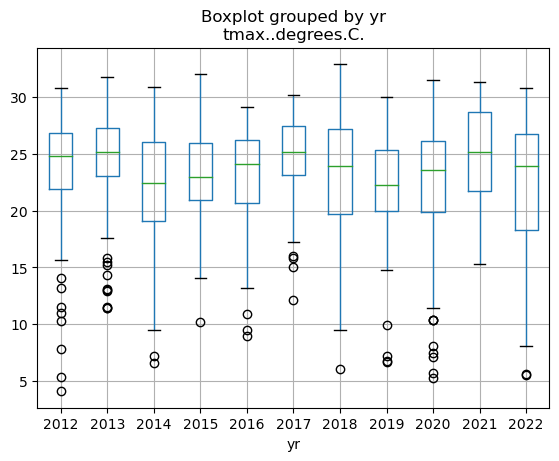

In [13]:
data.boxplot(column=['tmax..degrees.C.'], by='yr')
plt.show()

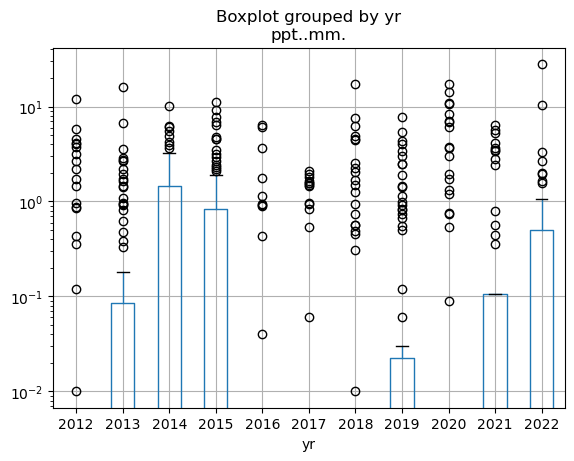

In [14]:
data.boxplot(column=['ppt..mm.'], by='yr')

plt.yscale('log')
plt.show()

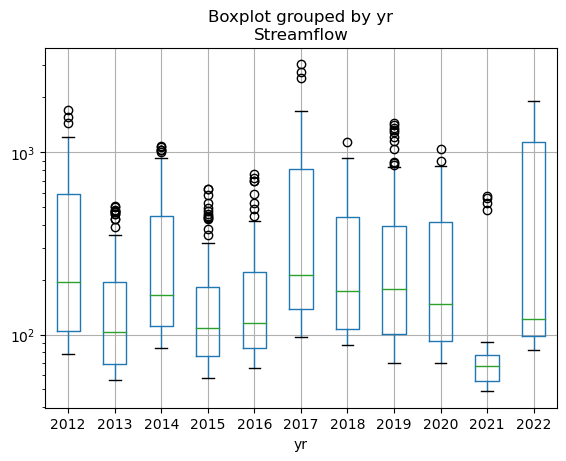

In [15]:
data.boxplot(column=['X_00060_00003'], by='yr')
plt.yscale('log')
plt.title("Streamflow")
plt.show()

In [16]:
data[[ 'tmax..degrees.C.','X_00010_00001']].corr()

,tmax..degrees.C.,X_00010_00001
tmax..degrees.C.,1.000000,0.699675
X_00010_00001,0.699675,1.000000


                    ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
ppt..mm.            1.000000         -0.138980          -0.339560   
tmin..degrees.C.   -0.138980          1.000000           0.921538   
tmean..degrees.C.  -0.339560          0.921538           1.000000   
tmax..degrees.C.   -0.444003          0.790301           0.966145   
tdmean..degrees.C.  0.318098          0.455822           0.230518   
vpdmin..hPa.       -0.377925          0.622565           0.743669   
vpdmax..hPa.       -0.456320          0.693680           0.897902   
X_00010_00001      -0.248552          0.650891           0.717169   
X_00010_00003      -0.221220          0.737962           0.784687   
X_00060_00003       0.153287         -0.423766          -0.456032   
doy                -0.139159          0.444051           0.469333   
log_Q               0.150060         -0.485364          -0.515228   

                    tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  \
ppt..mm.                   -

<Axes: >

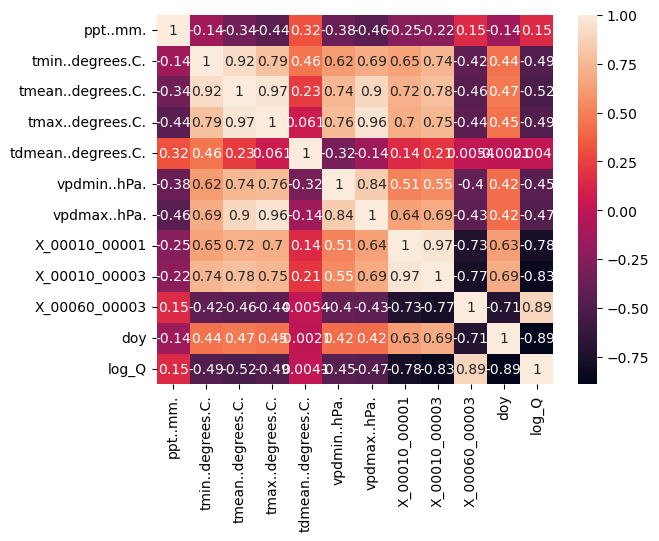

In [17]:
all_idv=[ 'ppt..mm.' 
     , 'tmin..degrees.C.'
     ,'tmean..degrees.C.'
     , 'tmax..degrees.C.', 'tdmean..degrees.C.',
      'vpdmin..hPa.', 
     'vpdmax..hPa.', 
        'X_00010_00001', # dep
  'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
     ,'doy','log_Q' ]
corr_matrix= data[ all_idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

                   ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q
ppt..mm.            1.00000          -0.339560     -0.456320  0.150060
tmean..degrees.C.  -0.33956           1.000000      0.897902 -0.515228
vpdmax..hPa.       -0.45632           0.897902      1.000000 -0.470214
log_Q               0.15006          -0.515228     -0.470214  1.000000


<Axes: >

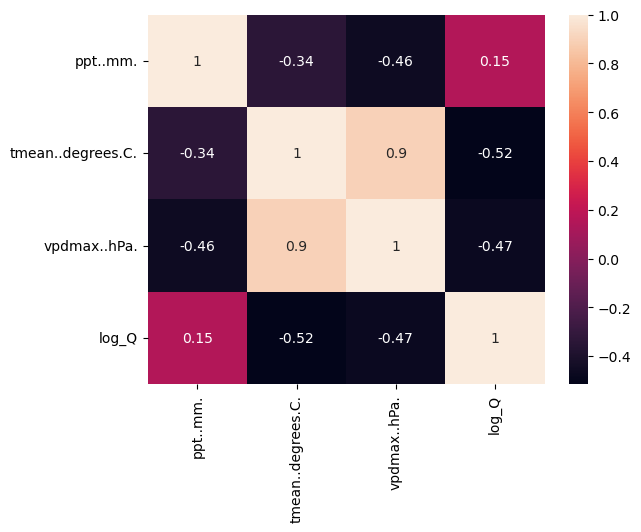

In [18]:
idv=[ 'ppt..mm.' 
     #, 'tmin..degrees.C.'
     ,'tmean..degrees.C.',
    # , 'tmax..degrees.C.', 'tdmean..degrees.C.',
     # ,'vpdmin..hPa.', 
     'vpdmax..hPa.' #, 
#        'X_00010_00001', # dep
 # 'X_00010_00003',  # dep
     #  'X_00060_00003' #,   'yr', 'mo',
    # ,'doy'
     ,'log_Q'
    ]
corr_matrix= data[ idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

In [19]:
#input=  data[  idv].to_numpy()
input=  data[  idv]

X_train, X_test, y_train, y_test = train_test_split( input,  data['X_00010_00003'], test_size=0.2, random_state=42)

print(X_train)
print(y_train)
print(X_train.columns)

     ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q
10       0.00                3.8          6.68  6.453625
841      0.00               19.9         32.31  3.988984
363      0.00               17.8         32.66  4.074142
821      0.00               18.3         23.40  4.241327
792      0.00               19.5         27.42  4.335983
..        ...                ...           ...       ...
106      0.95                5.2         10.59  5.659482
270      1.67                8.5          8.59  4.584967
860      2.68                6.2          4.54  7.251345
435      0.00               15.6         28.42  4.359270
102      0.00               16.4         24.43  6.068426

[722 rows x 4 columns]
10      6.0
841    14.4
363    13.9
821    14.5
792    14.5
       ... 
106     8.8
270    10.8
860     5.7
435    13.2
102    10.3
Name: X_00010_00003, Length: 722, dtype: float64
Index(['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q'], dtype='object')


In [20]:
print(idv)
idv2=idv +  ['yr' ]
print(idv2)
idv3=idv2 +  [  'X_00010_00003']
input=  data[  idv2]
#input
X=input[idv2]




X_train=X[X['yr']<2021]
#print(X_train)
X_test=X[X['yr']>=2021]

input2=  data[  idv3]
Y=input2[idv3]
y_train=Y[Y['yr']<2021][  'X_00010_00003']
print(y_train)

y_test=Y[Y['yr']>=2021][  'X_00010_00003']


['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q', 'yr']
0       7.4
1       6.9
2       6.7
3       6.8
4       5.0
       ... 
799    14.1
800    13.7
801    13.2
802    12.6
803    10.9
Name: X_00010_00003, Length: 804, dtype: float64


In [21]:
print(X_train)

X_train=X_train[[ 'ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']]
X_test= X_test[[ 'ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']]

     ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q    yr
0        0.00                9.8         14.10  6.811244  2012
1        1.73               12.3         20.24  7.106606  2012
2        0.96               11.7         12.99  7.279319  2012
3        0.01               12.8         16.28  7.352441  2012
4        0.00               13.8         24.63  7.438384  2012
..        ...                ...           ...       ...   ...
799      1.31               16.1         23.83  4.339902  2020
800      0.74               14.3         17.55  4.338597  2020
801      0.00               14.6         23.52  4.287716  2020
802      0.00               14.6         24.98  4.251348  2020
803      0.00               10.9         18.25  4.268298  2020

[804 rows x 5 columns]


0.9278910005530125


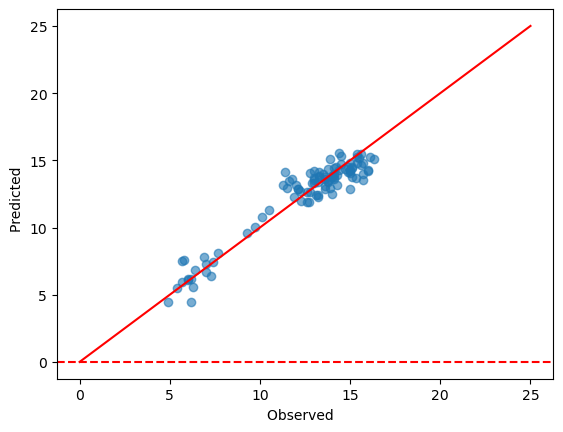

test: 0.9542735516853579
0.7347089161430714


In [22]:
linear_regr = LinearRegression()
linear_regr.fit(  X_train,  y_train )

train_fit= linear_regr.predict(X_train)

train_acc=    np.corrcoef(y_train , train_fit)[0, 1]    

print(train_acc)
yfit = linear_regr.predict(X_test)

plt.scatter( y_test , yfit , alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Observed  ")
plt.ylabel("Predicted  ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]

print("test:",correlation_coefficient)
print( mean_absolute_error( y_test , yfit))

In [23]:
max_depths=[1,2,3,4,5,6,7,8,9]

for max_depth in max_depths:
    print("max depth:",max_depth)
    regr = DecisionTreeRegressor( random_state=42 ,max_depth=  max_depth )
    regr.fit(  X_train,  y_train )
    train_fit=regr.predict(X_train)
    yfit = regr.predict(X_test)
    correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
    rms = mean_squared_error(y_test, yfit, squared=False)
    # Print the correlation coefficient
    print("test correlation_coefficient:", np.corrcoef(y_train , train_fit)[0, 1] )
    print("test correlation_coefficient:",correlation_coefficient)
    print("MSE:", mean_absolute_error( y_test , yfit ) )
    print("RMS:",rms)

max depth: 1
test correlation_coefficient: 0.8165498602305193
test correlation_coefficient: 0.9042986623193673
MSE: 1.505193281335525
RMS: 1.7610761450031711
max depth: 2
test correlation_coefficient: 0.8805069159236102
test correlation_coefficient: 0.9254189219083626
MSE: 1.271579296782434
RMS: 1.5639564999921571
max depth: 3
test correlation_coefficient: 0.9142914780227521
test correlation_coefficient: 0.9481383603885557
MSE: 1.004086996705929
RMS: 1.2836490285415458
max depth: 4
test correlation_coefficient: 0.9351320661536975
test correlation_coefficient: 0.9476537079101948
MSE: 0.8895518244465856
RMS: 1.1705357901313747
max depth: 5
test correlation_coefficient: 0.9466389279839483
test correlation_coefficient: 0.9444213586730005
MSE: 0.8950962944967064
RMS: 1.1543329476791537
max depth: 6
test correlation_coefficient: 0.9543538521338535
test correlation_coefficient: 0.9436910724665878
MSE: 0.8984971875223751
RMS: 1.1641588993270324
max depth: 7
test correlation_coefficient: 0.9610

max depth: 5
correlation_coefficient: 0.9444213586730005
MSE: 0.8950962944967064
RMS: 1.1543329476791537


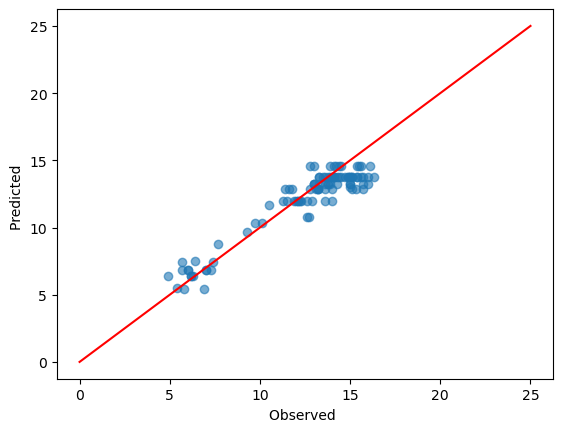

In [24]:
print("max depth:", 5)
regr = DecisionTreeRegressor( random_state=42 ,max_depth=  5)
regr.fit(  X_train,  y_train )
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

In [25]:
print(regr.feature_importances_)
print(idv)

[0.00313948 0.17301445 0.00829519 0.81555088]
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']


In [26]:
params = {
    "n_estimators":  300,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [27]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 1.2127


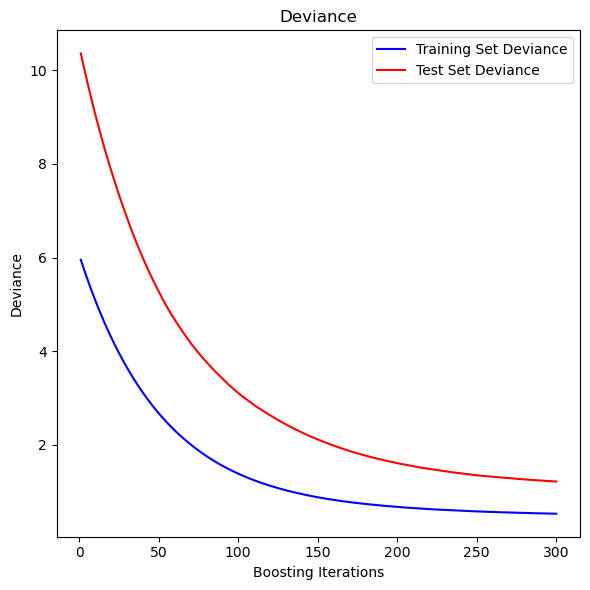

In [28]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

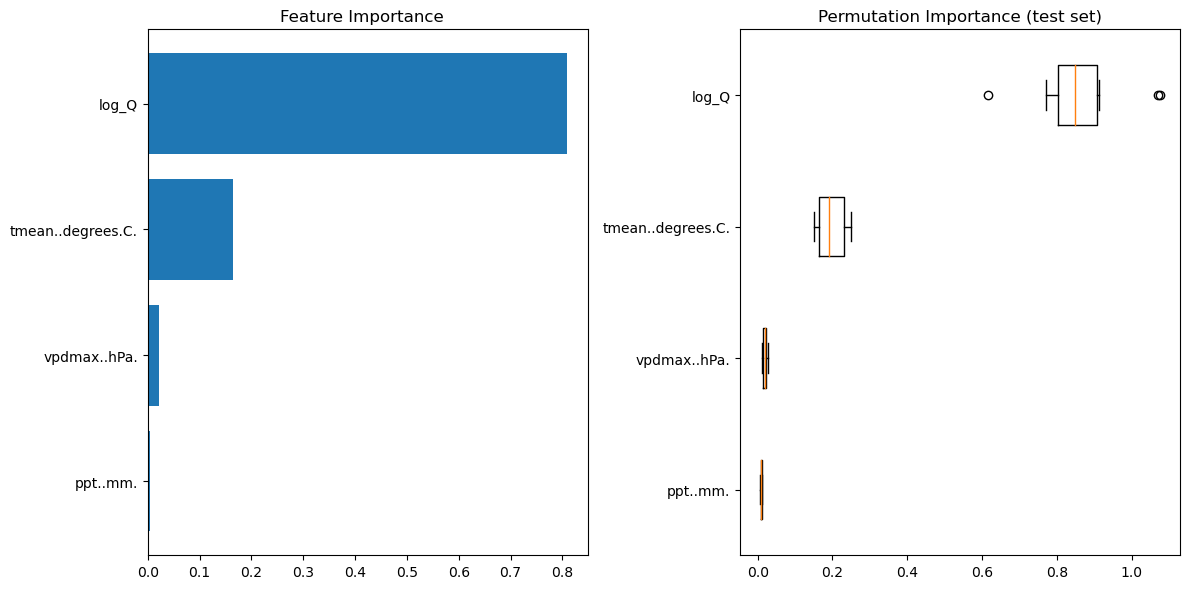

In [29]:
# Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). 
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(idv)[sorted_idx])
plt.title("Feature Importance  ")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array( idv)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [30]:
#from sklearn.datasets import load_breast_cancer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

#X, y = load_breast_cancer(return_X_y=True, as_frame=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)
#print(f"Baseline accuracy on test data: {clf.score(X_test, y_test):.2}")

#X_train

In [31]:
from sklearn.inspection import permutation_importance


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    
    
    perm_sorted_idx = result.importances_mean.argsort()
    print(perm_sorted_idx)
    ax.boxplot(
        result.importances[perm_sorted_idx].T, # importances : Raw permutation importance scores.
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

The plot on the left shows the Gini importance of the model. 

permuting a feature

[0 2 1 3]


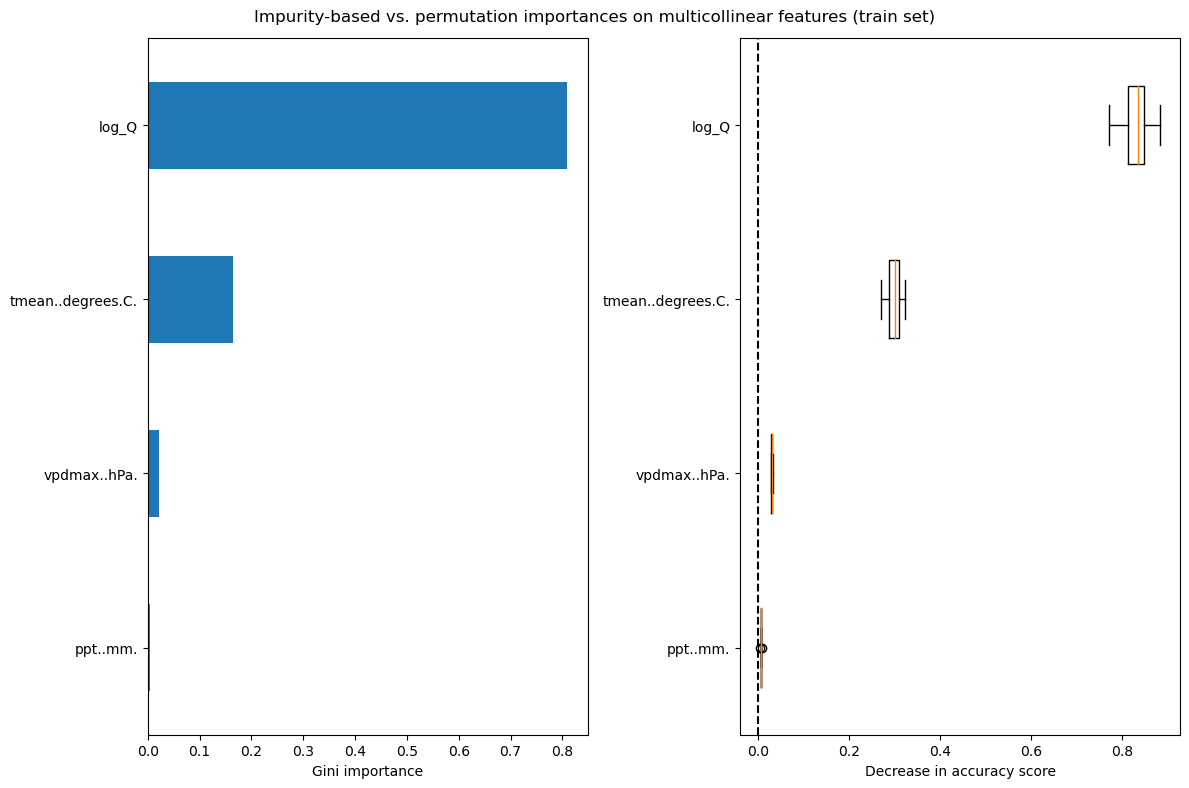

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(reg, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

correlation_coefficient: 0.9583125729570303
MSE: 0.8700162301491601
RMS: 1.1012908725712038


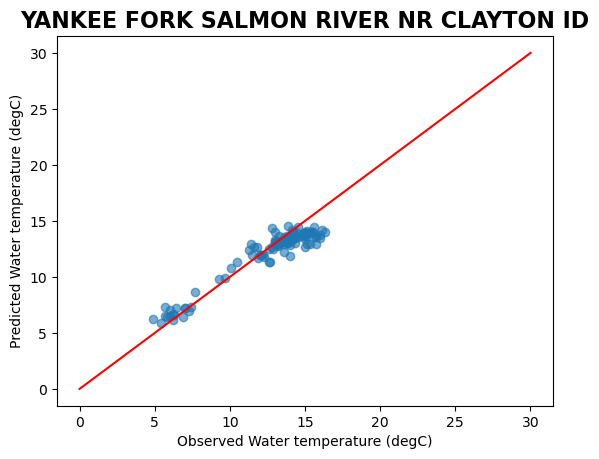

In [33]:
#regr = DecisionTreeRegressor( random_state=42 ,max_depth=  6)
#regr.fit(  X_train,  y_train )
#train_fit=regr.predict(X_train)
#yfit = regr.predict(X_test)

regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed Water temperature (degC)")
plt.ylabel("Predicted Water temperature (degC)")

x = np.linspace(0, 30, 30)
y = x
plt.plot(x, y, color='red')

plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.show()

804     9.3
805     9.7
806    10.1
807    10.5
808    15.0
       ... 
898    13.0
899    12.6
900    12.8
901    13.2
902    13.3
Name: X_00010_00003, Length: 99, dtype: float64
[ 9.78079909  9.89907274 10.82272689 11.35804222 13.61086808 13.91325679
 13.61086808 14.12483741 14.51191289 12.93672713 13.95445607 13.64203108
 13.61086808 13.36657053 13.81540847 13.97980275 14.42503883 13.56434128
 13.5455004  14.05045512 14.01968191 13.78563108 13.77316715 12.9223379
 13.46712986 14.05367063 13.63820916 12.6306449  12.85106533 12.24288907
 11.88288603 12.93528275 13.5370002  14.16709813 14.42503883 14.01968191
 13.97980275 14.01968191 12.50754823 11.73620247 11.33381367 11.95486901
 11.29321353 11.72082172 11.98848122 12.38825421 12.65874327 11.98848122
 11.95486901 11.98198569 12.70732088 12.93262004  6.69057516  7.23787086
  7.25904884  7.31298673  6.50867221  6.52505337  6.59264606  7.06344716
  7.2018458   7.31655222  6.38316364  6.43542245  5.92132035  6.26528706
  6.13608273  6.93

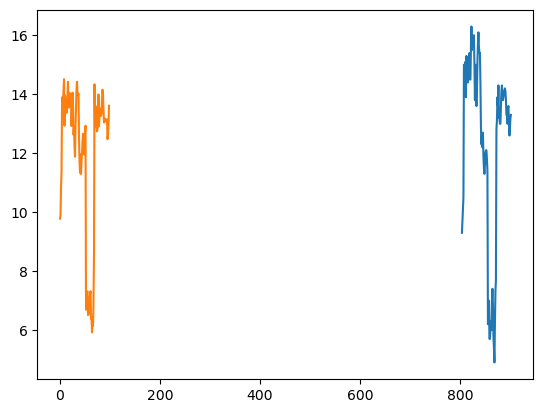

804    2021-06-01
805    2021-06-02
806    2021-06-03
807    2021-06-04
808    2021-07-15
          ...    
898    2022-08-27
899    2022-08-28
900    2022-08-29
901    2022-08-30
902    2022-08-31
Name: Date, Length: 99, dtype: object


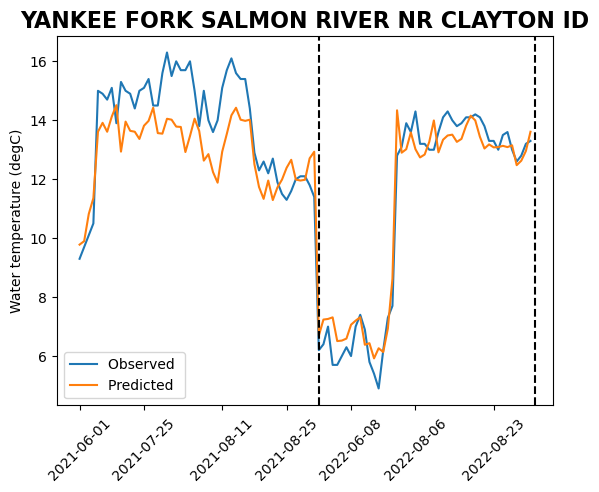

In [34]:



print(y_test)
print(yfit)
print(Y)
plt.plot(y_test)
plt.plot(yfit)
plt.show()

date=data[data['yr']>=2021][  'Date']
print(date)
plt.plot(date,y_test , label='Observed ')

#plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter())  # Formats labels concisely

plt.plot(date,yfit , label='Predicted ')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Display every 10th label
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically adjusts for missing dates
plt.axvline(x= "2022-06-01", color='black', linestyle='--')
plt.axvline(x= "2023-06-01", color='black', linestyle='--')
plt.gca().xaxis.set_tick_params(rotation=45 )  # Rotate labels for readability
plt.ylabel("Water temperature (degC)")
#pd.dataframe("date"= ,"y_test"= ,"yfit"=yfit)
plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.legend()

In [35]:
max_bias=max(yfit-y_test)
max_bias

1.612986728914783

In [36]:
#plt.hist(y_test , alpha=0.5)
#plt.show()

#plt.hist(yfit , alpha=0.5)
#plt.show()

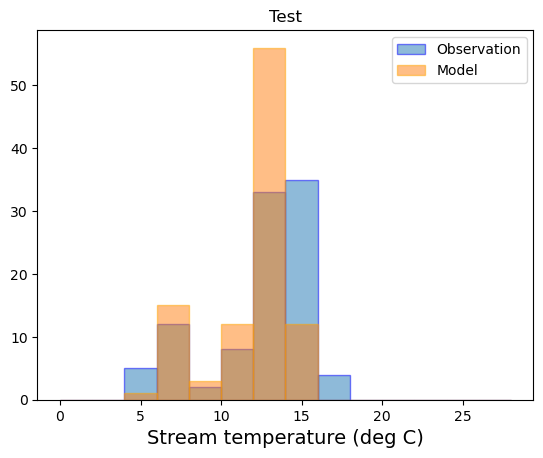

In [37]:
bins = np.arange(10, 25, 2)
bins = np.arange(0, 30, 2)
bars1, _, _ = plt.hist(y_test , alpha=0.5 , label="Observation",bins=bins , edgecolor='blue')
bars2, _, _ = plt.hist(yfit , alpha=0.5, label="Model",bins=bins , edgecolor='orange')
plt.legend(   )
plt.xlabel("Stream temperature (deg C)", fontsize=14 )
plt.title("Test")
plt.show()

In [38]:
#plt.hist(y_test , alpha=0.5)
#plt.hist(yfit , alpha=0.5)

#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["y_test","yfit"])
#plt.legend()

In [39]:
#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["observation","model"])
#plt.legend()
#plt.xlabel("Stream temperature (deg C)", fontsize=14 )
#plt.title("Test")

upper alpha=0.95

correlation_coefficient: 0.9534887106611036
MSE: 0.9405837693390772
RMS: 1.101654958843626


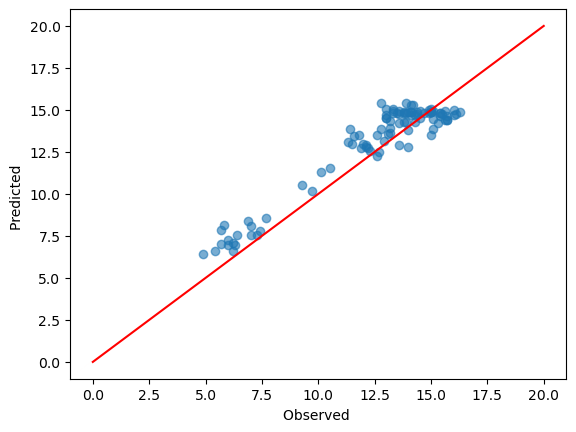

In [40]:
regr = ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

lower upper alpha=0.05

correlation_coefficient: 0.943795243209654
MSE: 1.6558189492013446
RMS: 1.9318206813826821


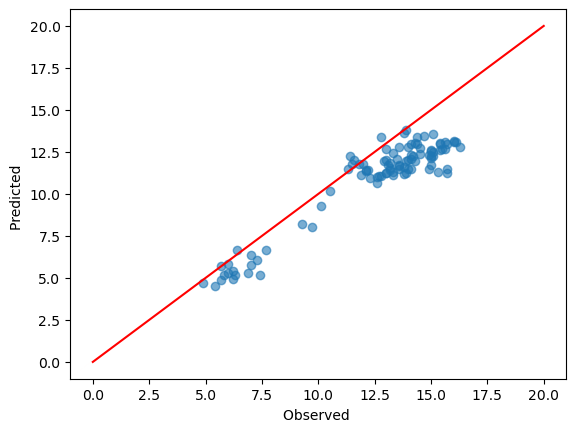

In [41]:
regr = ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.05,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

In [42]:
params = {"loss": "lad" , #,"huber",
    "n_estimators":  250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

correlation_coefficient: 0.9578729653781319
MSE: 0.931042251963608
RMS: 1.1605340511136497


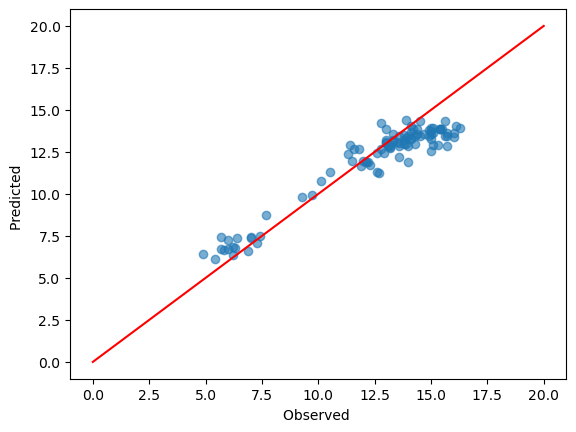

In [43]:
regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

In [44]:
data = {
    
    "site"  : [ site],

    
"station_nm" :[df3['station_nm'][0]],
    "dec_lat_va":[df3['dec_lat_va'][0]],
    "dec_long_va": [df3['dec_long_va'][0]],
    'max_bias': [max_bias],
        "RMS": [rms],
        "correlation_coefficient": [correlation_coefficient]
       }
result = pd.DataFrame(data)
print(result)

       site                              station_nm  dec_lat_va  dec_long_va  \
0  13296000  YANKEE FORK SALMON RIVER NR CLAYTON ID   44.278889  -114.733889   

   max_bias       RMS  correlation_coefficient  
0  1.612987  1.160534                 0.957873  


In [46]:
file= "result"+site+".csv"
file
result.to_csv(file)